In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import io
import os, glob
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D,Convolution2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
img_height,img_width=224,224
batch_size=32

In [3]:
data_dir="DATASET"
classes=[]
for file in os.listdir(data_dir):
    classes+=[file]
print(classes)
print(len(classes))

['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Puffers', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal', 'Sharks', 'Shrimp', 'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale']
23


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_data=train_datagen.flow_from_directory(data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='training')
test_data=train_datagen.flow_from_directory(data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation')

Found 9607 images belonging to 23 classes.
Found 4104 images belonging to 23 classes.


In [5]:
base_model2 = tf.keras.applications.ResNet50(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model11 = Sequential()
model11.add(base_model2)
model11.add(GlobalAveragePooling2D())
model11.add(Dense(32, activation='relu'))
model11.add(BatchNormalization())
model11.add(Dropout(0.2))
model11.add(Dense(23, activation='softmax'))
model11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 23)                7

In [6]:
model11.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist1=model11.fit(train_data,epochs=35,validation_data=test_data,verbose=1)

Epoch 1/35
301/301 [==============================] - 4640s 15s/step - loss: 2.5038 - accuracy: 0.2884 - val_loss: 3.2846 - val_accuracy: 0.0653
Epoch 2/35
301/301 [==============================] - 4413s 15s/step - loss: 1.8895 - accuracy: 0.4407 - val_loss: 3.7182 - val_accuracy: 0.0385
Epoch 3/35
301/301 [==============================] - 4044s 13s/step - loss: 1.5797 - accuracy: 0.5315 - val_loss: 2.7383 - val_accuracy: 0.2249
Epoch 4/35
301/301 [==============================] - 4041s 13s/step - loss: 1.3291 - accuracy: 0.5974 - val_loss: 1.6459 - val_accuracy: 0.5007
Epoch 5/35
301/301 [==============================] - 4047s 13s/step - loss: 1.1069 - accuracy: 0.6698 - val_loss: 3.5245 - val_accuracy: 0.2622
Epoch 6/35
301/301 [==============================] - 4029s 13s/step - loss: 0.9337 - accuracy: 0.7199 - val_loss: 2.1682 - val_accuracy: 0.4561
Epoch 7/35
301/301 [==============================] - 4030s 13s/step - loss: 0.7573 - accuracy: 0.7700 - val_loss: 1.5826 - val_ac

In [7]:
model11.evaluate(test_data)
model11.save("models/ResNet50.h5")

129/129 [==============================] - 329s 2s/step - loss: 2.1910 - accuracy: 0.5641


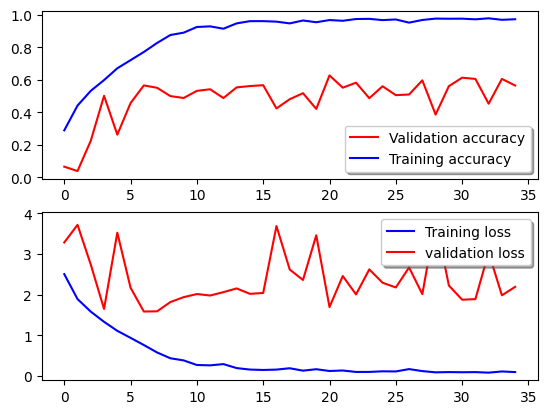

In [8]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [9]:
#appling mobile net
base_model2 =tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model2 = Sequential()
model2.add(base_model2)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(23, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [10]:
model2.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist2=model2.fit_generator(train_data,epochs=20,validation_data=test_data,verbose=1)
model2.evaluate(test_data)
model2.save("models/Mobilenet.h5")

C:\Users\0611\AppData\Local\Temp\ipykernel_6760\459368406.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist2=model2.fit_generator(train_data,epochs=20,validation_data=test_data,verbose=1)


Epoch 1/20
301/301 [==============================] - 1574s 5s/step - loss: 1.3892 - accuracy: 0.6047 - val_loss: 1.4829 - val_accuracy: 0.5831
Epoch 2/20
301/301 [==============================] - 1449s 5s/step - loss: 0.8337 - accuracy: 0.7590 - val_loss: 1.4745 - val_accuracy: 0.6196
Epoch 3/20
301/301 [==============================] - 1444s 5s/step - loss: 0.6260 - accuracy: 0.8177 - val_loss: 1.7469 - val_accuracy: 0.5453
Epoch 4/20
301/301 [==============================] - 1452s 5s/step - loss: 0.5117 - accuracy: 0.8450 - val_loss: 1.6391 - val_accuracy: 0.5887
Epoch 5/20
301/301 [==============================] - 1478s 5s/step - loss: 0.3813 - accuracy: 0.8845 - val_loss: 1.6299 - val_accuracy: 0.6004
Epoch 6/20
301/301 [==============================] - 1632s 5s/step - loss: 0.3261 - accuracy: 0.9016 - val_loss: 1.4142 - val_accuracy: 0.6369
Epoch 7/20
301/301 [==============================] - 1497s 5s/step - loss: 0.2887 - accuracy: 0.9154 - val_loss: 1.5821 - val_accuracy:

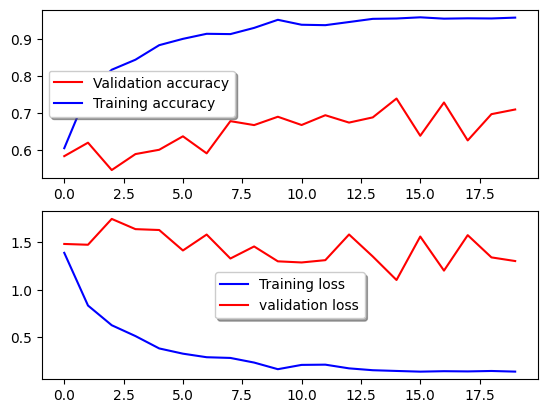

In [17]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist2.history['val_accuracy'], color='r',label="Validation accuracy")
ax[0].plot(hist2.history['accuracy'], color='b', label="Training accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist2.history['loss'], color='b', label="Training loss")
ax[1].plot(hist2.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

1/1 [==============================] - 0s 59ms/step
[0.27652448 0.47234172 0.27728167 0.98174465 0.0337577  0.90574396
 0.99997884 0.81618255 0.04136072 0.30892837 0.11501018 0.94485354
 0.1000315  0.49744725 0.44144496 0.08850182 0.08191951 0.9866634
 0.5909593  0.17124934 0.09009643 0.93251455 0.9975216 ]


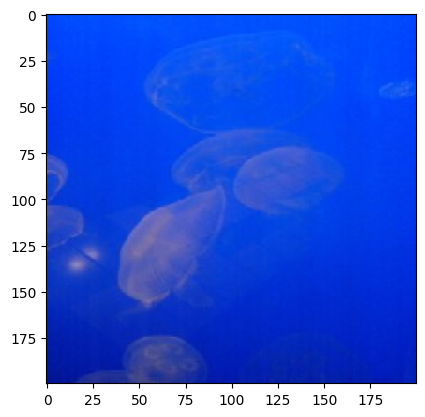

Prediction: Jelly Fish


In [23]:
from skimage import io
from tensorflow.keras.preprocessing import image

img = image.load_img(r'DATASET\Jelly Fish\255709842_a751156ede_o.jpg', grayscale=False, target_size=(224,224))
show_img=image.load_img(r'DATASET\Jelly Fish\255709842_a751156ede_o.jpg', grayscale=False, target_size=(200, 200))
Classes = classes
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model2.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',Classes[ind])